# Практическая работа №1

### Используемые библиотеки

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import fsolve
from numpy import inf, arange
from numpy.linalg import det

import json
from math import exp, sqrt, pi

### Используемые алгоритмы
#### Нормальное распределение
##### Нормальное распределение - это...
##### Формула:
$\frac{1}{\sigma\sqrt{2\pi}}\exp(-\frac{(x-2)^2}{2\sigma^2})$
###### , где $\sigma$ - среднее значение, а $\mu$ - cреднеквадратичное отклонение.

In [136]:
normal_distribution = lambda x, s, m: exp(-0.5 * ((x - m) / s) ** 2) / (s * sqrt(2 * pi))

## Пункт 1

In [137]:
file = open("data1.json", 'r')
frame = pd.DataFrame(json.loads(file.read()))
file.close()
print(f"Исходные наборы данных:\n{ frame }")

Исходные наборы данных:
     x    y
0   69  153
1   74  175
2   68  155
3   70  135
4   72  172
5   67  150
6   66  115
7   70  137
8   76  200
9   68  130
10  72  140
11  79  265
12  74  185
13  67  112
14  66  140
15  71  150
16  74  165
17  75  185
18  75  210
19  76  220


In [138]:
print(f"Среднее значение x: { frame['x'].mean() }")

Среднее значение x: 71.45


In [139]:
print(f"Медиана x: { frame['x'].median() }")

Медиана x: 71.5


In [140]:
print(f"Мода x: { frame['x'].mode()[0] }")

Мода x: 74


In [141]:
print(f"Дисперсия y: { frame['x'].var() }")

Дисперсия y: 14.576315789473687


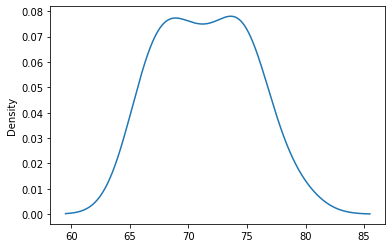

In [142]:
frame['x'].plot.kde()
plt.show()


In [143]:
sigma = frame['x'].std()
mu = frame['x'].mean()
integral = quad(lambda x: normal_distribution(x, sigma, mu), 80, +inf)
print(f"Вероятность того, что возраст больше 80, составит: {integral[0]} +/- {integral[1]}")

Вероятность того, что возраст больше 80, составит: 0.012563181452947533 +/- 2.9068309037497502e-11


In [144]:
print(f"Двумерное математическое ожидание: { frame['x'].mean(), frame['y'].mean() }")

Двумерное математическое ожидание: (71.45, 164.7)


In [145]:
print(f"Ковариационная матрица:\n{ frame.cov() }\n")

Ковариационная матрица:
            x            y
x   14.576316   128.878947
y  128.878947  1441.273684



In [146]:
print(f"Корреляция: { det(frame.cov()) }")

Корреляция: 4398.677285318566


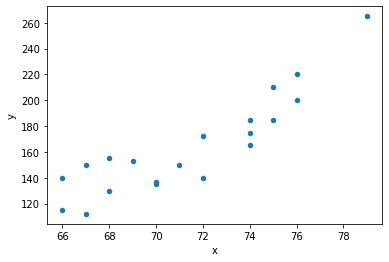

In [147]:
frame.plot.scatter('x', 'y')
plt.show()

## Пункт 2

In [148]:
file = open("data2.json", 'r')
frame = pd.DataFrame(json.loads(file.read()))
file.close()
print(f"Исходные наборы данных:\n{ frame }")

Исходные наборы данных:
    a   b   c
0  17  11  11
1  17   9   8
2  12  13  19


In [149]:
print(f"Ковариационная матрица:\n{ frame.cov() }")

Ковариационная матрица:
           a     b          c
a   8.333333  -5.0 -15.833333
b  -5.000000   4.0  11.000000
c -15.833333  11.0  32.333333


In [150]:
print(f"Обобщенная дисперсия: { det(frame.cov().values) }")


Обобщенная дисперсия: 2.2204460492503156e-14


## Пункт 3

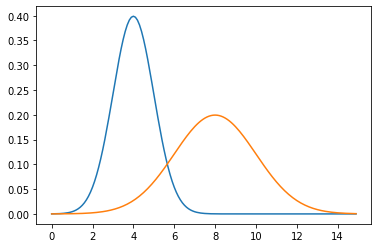

In [151]:
Na = lambda x: normal_distribution(x, 1, 4)
Nb = lambda x: normal_distribution(x, 2, 8)
arr = [x for x in arange(0, 15, 0.1)]

plt.plot(arr, [Na(x) for x in arr])
plt.plot(arr, [Nb(x) for x in arr])
plt.show()

In [152]:
for i in range(5, 8):
    print(f"Значение { i } с большей вероятностью было сгенерировано распределением { 'Na' if max(Na(i), Nb(i)) == Na(i) else 'Nb' }")

Значение 5 с большей вероятностью было сгенерировано распределением Na
Значение 6 с большей вероятностью было сгенерировано распределением Nb
Значение 7 с большей вероятностью было сгенерировано распределением Nb


In [153]:
print(f"Значение, которое могло быть сгенерировано обеими распределениями с равной вероятностью: { fsolve(lambda x: Na(x) - Nb(x), 5.0)[0] }")

Значение, которое могло быть сгенерировано обеими распределениями с равной вероятностью: 5.659909655901637
